In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [133]:
def single_bar_chart(A,B, N=1,width=0.3,title="",subpopulation_name="",vars_of_interest=('M','F')):
    
    ind = np.arange(N)  # the x locations for the groups
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, A, width, color='r', ecolor= "black")
    rects2 = ax.bar(ind + width, B, width, color='b', ecolor= "black")
    # add some text for labels, title and axes ticks
    ax.set_title(title,fontsize=16)
    ax.set_xticks([width])
    ax.set_xticklabels((''),fontsize=14)
    ax.set_ylim(0,100)
    ax.set_ylabel('%',fontsize=14)
    ax.set_title(subpopulation_name,fontsize=16)
    ax.legend((rects1[0], rects2[0]), vars_of_interest,fontsize=12)
#     ax.set_yticklabels(np.arange(0,110,10),fontsize=13)
#     ax.legend((rects1[0], rects2[0]), ('A', 'B'))
    def autolabel(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 0.5*height,
                    '%.2f' % float(height),
                    ha='center', va='bottom',color="white",fontweight='bold',fontsize=15)

    autolabel(rects1)
    autolabel(rects2)
    #ax.set_xlim(-0.1,0.2)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.gca().set_xticks([])

In [118]:
import pandas as pd 
data =pd.read_csv("../data/2010_Census_Populations_by_Zip_Code.csv")
print data.keys()

Index([u'Zip Code', u'Total Population', u'Median Age', u'Total Males',
       u'Total Females', u'Total Households', u'Average Household Size'],
      dtype='object')


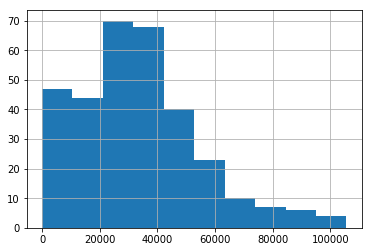

In [115]:
data["Total Population"].hist()

In [9]:
data["Total Population"].mean()

33241.341692789967

In [18]:
population_of_interest=['Total Males','Total Females']

In [30]:
subset_data = data.mean()[population_of_interest]
subset_data/sum(subset_data)

Total Males      0.493108
Total Females    0.506892
dtype: float64

In [21]:
subset_data = data[data["Total Population"]>30000].mean()[population_of_interest]

In [24]:
subset_data/sum(subset_data)

Total Males      0.492847
Total Females    0.507153
dtype: float64

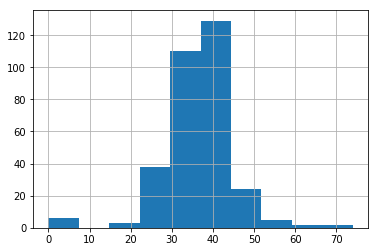

In [35]:
data["Median Age"].hist()

In [135]:
def subpopulation_viz(condition,subpopulation_name):
    if condition !=None: 
        subset_data = data[condition].mean()[population_of_interest]
        result =  subset_data/sum(subset_data)*100
        single_bar_chart(result[0],result[1],width=0.1,subpopulation_name=subpopulation_name)
    else:
        single_bar_chart(0,0,width=0.1,subpopulation_name=subpopulation_name)

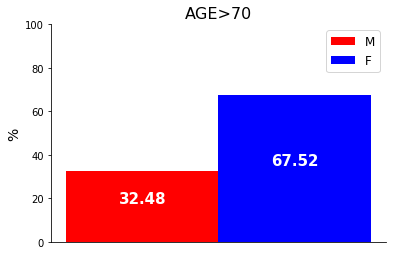

In [136]:
subpopulation_viz(data["Median Age"]>70,"AGE>70")

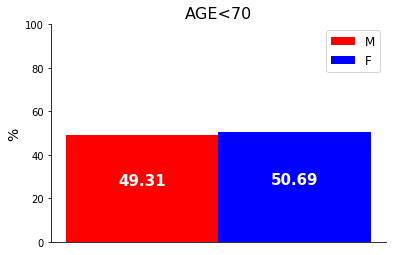

In [138]:
subpopulation_viz(data["Median Age"]<70,"AGE<70")

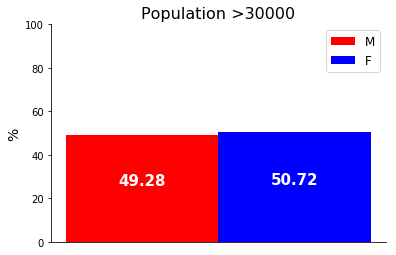

In [141]:
subpopulation_viz(data["Total Population"]>30000,"Population >30000")

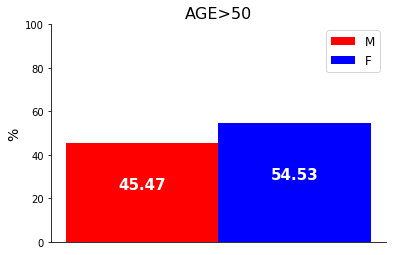

In [142]:
subpopulation_viz(data["Median Age"]>50,"AGE>50")

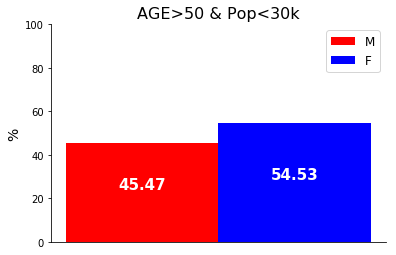

In [143]:
subpopulation_viz((data["Median Age"]>50)&(data["Total Population"]<30000),"AGE>50 & Pop<30k")

In [146]:
# data[(data["Median Age"]>50)&(data["Total Population"]<30000)] ==data[(data["Median Age"]>50)]

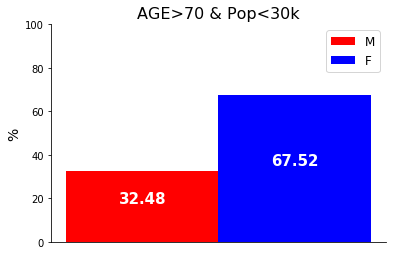

In [145]:
subpopulation_viz((data["Median Age"]>70)&(data["Total Population"]<30000),"AGE>70 & Pop<30k")

In [147]:
subset_data = data[(data["Median Age"]>50)&(data["Total Population"]>30000)].mean()[population_of_interest]
subset_data/sum(subset_data)

Total Males     NaN
Total Females   NaN
dtype: float64

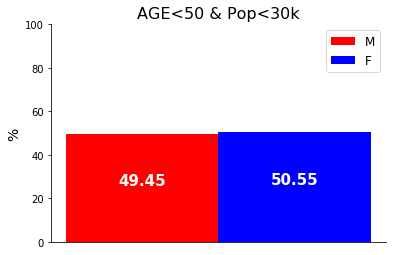

In [148]:
subpopulation_viz((data["Median Age"]<50)&(data["Total Population"]<30000),"AGE<50 & Pop<30k")

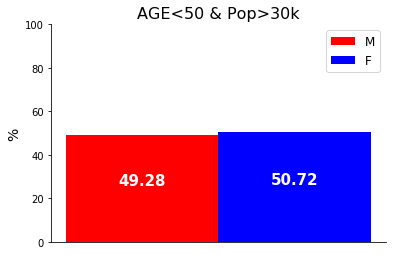

In [149]:
subpopulation_viz((data["Median Age"]<50)&(data["Total Population"]>30000),"AGE<50 & Pop>30k")

In [ ]:
4